빵형의 얼굴인식 copy

In [1]:
import dlib, cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.patheffects as path_effects

detector = dlib.get_frontal_face_detector()
sp = dlib.shape_predictor('models\shape_predictor_68_face_landmarks.dat')
facerec = dlib.face_recognition_model_v1('models\dlib_face_recognition_resnet_model_v1.dat')

In [2]:
def find_faces(img): 
    dets = detector(img)

    # 얼굴을 하나도 찾지 못했을 경우 return 빈 배열 
    if len(dets) == 0:
        return np.empty(0), np.empty(0), np.empty(0)
    
    # 결과물 저장할 변수들
    rects, shapes = [], []
    shapes_np = np.zeros((len(dets), 68, 2), dtype=int)

    for k, d in enumerate(dets): 
        rect = ((d.left(), d.top()), (d.right(), d.bottom()))
        rects.append(rect)

        # 랜드마크 구하기 
        shape = sp(img, d)

    # numpy array 로 바꾸기 
    for i in range(0, 68): 
        shapes_np[k][i] = (shape.part(i).x, shape.part(i).y)

    shapes.append(shape)

    return rects, shapes, shapes_np

# 68개의 점 -> 128개의 벡터(거리로 유사도 측정함)
def encode_faces(img, shapes): 
    face_descriptors = []
    for shape in shapes: 
        face_descriptor = facerec.compute_face_descriptor(img, shape)
        face_descriptors.append(np.array(face_descriptor))
    
    return np.array(face_descriptors)

In [3]:
# 베이스가 되는 사진 
img_path = {
    'jiwon': 'img\jiwon.jpg'
}

descs = {
    'jiwon': None
}

for name, img_path in img_path.items(): 
    img_bgr = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

    _, img_shapes, img_shapes_np = find_faces(img_rgb)
    descs[name] = encode_faces(img_rgb, img_shapes)[0]

np.save('img/descs.npy', descs)
print(descs)

{'jiwon': array([-0.07487904,  0.09757917,  0.06085797,  0.0109427 , -0.02860259,
       -0.07975081,  0.01055702, -0.06568343,  0.12808396, -0.04333057,
        0.26924944, -0.05138543, -0.20674357, -0.06696519, -0.02760537,
        0.19986087, -0.22559816, -0.07729307, -0.09368213,  0.02433638,
        0.09279302,  0.01710416, -0.01785119,  0.00151803, -0.09125791,
       -0.3202804 , -0.06953989, -0.04273822,  0.03568555, -0.03114061,
       -0.0278597 ,  0.06970037, -0.16550271, -0.09696876,  0.07082685,
        0.09324436, -0.07803135, -0.0462034 ,  0.21843565, -0.05233807,
       -0.2216147 ,  0.02326651,  0.11167943,  0.23185691,  0.20000905,
        0.09852847, -0.01039893, -0.13920617,  0.11405016, -0.20275463,
        0.01491394,  0.1393102 ,  0.10345832,  0.16951251, -0.00344857,
       -0.08433422,  0.07650305,  0.11357918, -0.15641984, -0.02038136,
        0.08782917, -0.16861928,  0.01593259, -0.03842765,  0.19755508,
       -0.00869881, -0.10445873, -0.12828529,  0.09008

In [4]:
img_bgr = cv2.imread('img/test.jpg')
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

rects, shapes, _ = find_faces(img_rgb)
descriptors = encode_faces(img_rgb, shapes)

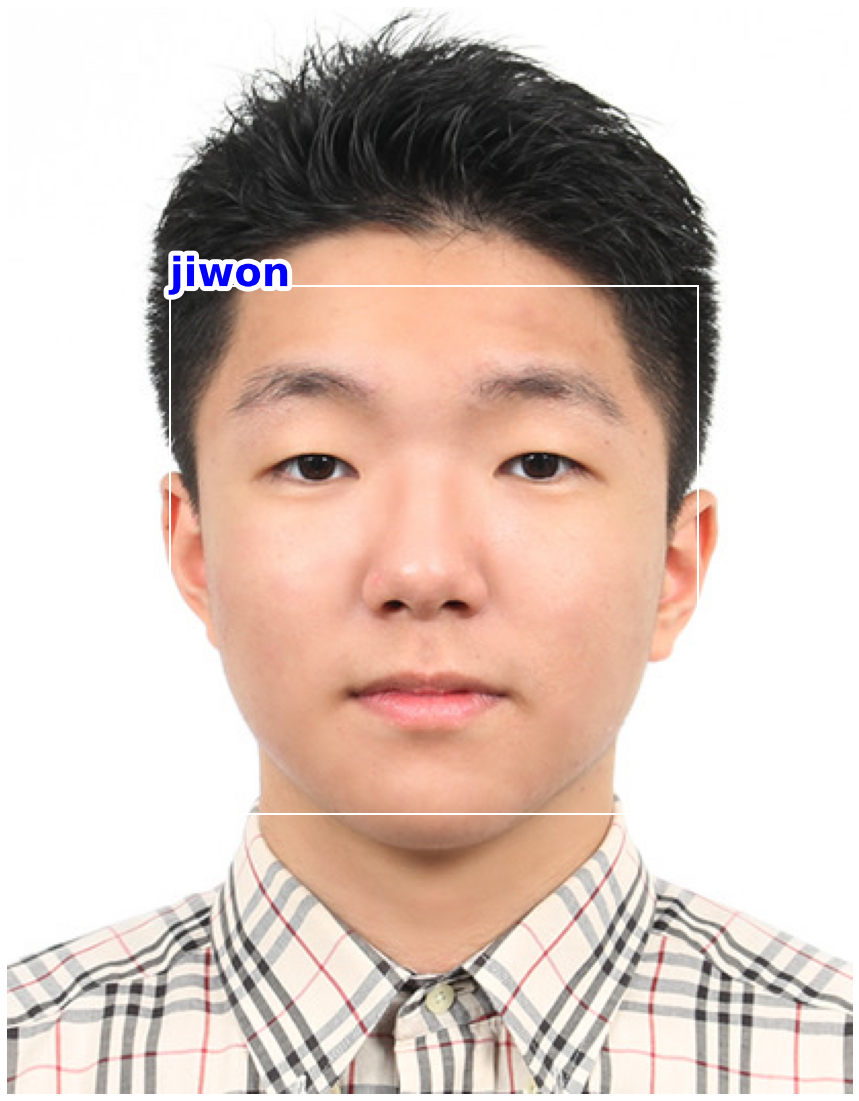

In [5]:
# Visualize Output

fig, ax = plt.subplots(1, figsize=(20, 20))
ax.imshow(img_rgb)

for i, desc in enumerate(descriptors):
    found = False

    for name, saved_desc in descs.items(): 
        # 유클리드 distance (벡터거리를 구하는 함수)
        dist = np.linalg.norm([desc] - saved_desc, axis=1)

        if dist < 0.6: 
            found = True

            text = ax.text(rects[i][0][0], rects[i][0][1], name, 
                color='b', fontsize=40, fontweight='bold')
            text.set_path_effects([path_effects.Stroke(linewidth=10, foreground='white'), path_effects.Normal()])
            rect = patches.Rectangle(rects[i][0], 
                rects[i][1][1] - rects[i][0][1], rects[i][1][0] - rects[i][0][0], 
                linewidth=2, edgecolor = 'w', facecolor='none')
            ax.add_patch(rect)
            break
    if not found: 
        ax.text(rects[i][0][0], rects[i][0][1], 'unknown', 
            color='r', fontsize=20, fontweight='bold')
        rect = patches.Rectangle(rects[i][0], 
            rects[i][1][1] - rects[i][0][1], rects[i][1][0] - rects[i][0][0], 
            linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)

plt.axis('off')
plt.savefig('result/output.png')
plt.show()
